 "La empresa Global Superstore tiene presencia mundial y un alto volumen de ventas, pero necesita identificar focos de ineficiencia financiera (fugas de dinero) y oportunidades de expansión estratégica para maximizar su beneficio neto."

In [ ]:
#Inicialmente cargamos el dataset mediante pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy._core.fromnumeric import mean
df = pd.read_csv("C:/Users/usuario/Desktop/Académico/Doctorado/Doctorado/Cursos/Data Science II/Datasets/Global_Superstore2.csv", encoding="latin-1")


In [2]:
#Una vez cargado el dataset, revisamos su estructura, tipos de datos y valores nulos
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [3]:
#chequeamos suma de nulos por columna
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
#Revisamos las primeras filas para entender la estructura de los datos
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit_Price,Order_Year,Order_Month,Shipping_Cost_Per_Sale
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.650,7,0.0,762.1845,933.57,Critical,329.950,2012,7,0.404204
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.7650,923.63,Critical,412.155,2013,2,0.248997
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,5175.171,9,0.1,919.9710,915.49,Medium,575.019,2013,10,0.176900
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,2892.510,5,0.1,-96.5400,910.16,Medium,578.502,2013,1,0.314661
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,2832.960,8,0.0,311.5200,903.04,Critical,354.120,2013,11,0.318762


In [4]:
#Eliminación de columnas innecesarias por valores nulos (Postal Code no aporta información relevante ya que contamos con Región, Estado y Ciudad)
df.drop(columns=['Postal Code'], inplace=True)

In [5]:
#Revisamos tipos de datos por columna para detectar posibles inconsistencias
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [6]:
#Cambio de tipo de dato para la columna 'Order Date' y 'Ship Date' a tipo fecha
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')

In [7]:
#Agregamos una nueva columna de Unit Price para analizar el precio unitario de cada producto
df['Unit_Price'] = df['Sales'] / df['Quantity']
#Tambien desglozamos las fechas para obtener año y mes de cada orden, lo que nos permitirá analizar tendencias temporales en las ventas
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month


In [8]:
#Clasificamos las columnas en numéricas , categóricas y fechas para facilitar su análisis posterior
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
date_cols = df.select_dtypes(include=['datetime64']).columns
print("Columnas numéricas:", numerical_cols)
print("Columnas categóricas:", categorical_cols)
print("Columnas de fecha:", date_cols)

Columnas numéricas: Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Unit_Price'],
      dtype='object')
Columnas categóricas: Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority'],
      dtype='object')
Columnas de fecha: Index(['Order Date', 'Ship Date'], dtype='object')


In [9]:


#Chequear valores imposibles o inconsistentes

def dq_score(df):
    impossible_values = {
        'Quantity': df[df['Quantity'] < 0].shape[0],
        'Sales': df[df['Sales'] < 0].shape[0],
        'Unit_Price': df[df['Unit_Price'] < 0].shape[0],
        'Discount': df[df['Discount'] < 0].shape[0],
        'Profit': df[df['Profit'] < 0].shape[0]}  
    total_impossible = sum(impossible_values.values())
    total_rows = df.shape[0]
    dq_score = 100 - (total_impossible / total_rows * 100)
    return dq_score, impossible_values  
dq_score_value, impossible_values = dq_score(df)
print(f"DQ Score: {dq_score_value:.2f}%")
print("Valores imposibles encontrados:")
for column, count in impossible_values.items():
    print(f"{column}: {count}")

DQ Score: 75.54%
Valores imposibles encontrados:
Quantity: 0
Sales: 0
Unit_Price: 0
Discount: 0
Profit: 12544


Como vemos, tenemos valores de profit negativos pero eso es común en el mercado ya que a veces es necesario seguir dentro de ciertos mercados
aunque conlleve pérdidas. Estar dentro de esos mercados le aporta a la empresa valores o consideraciones más importantes que el dinero.
Los demás valores estan bien

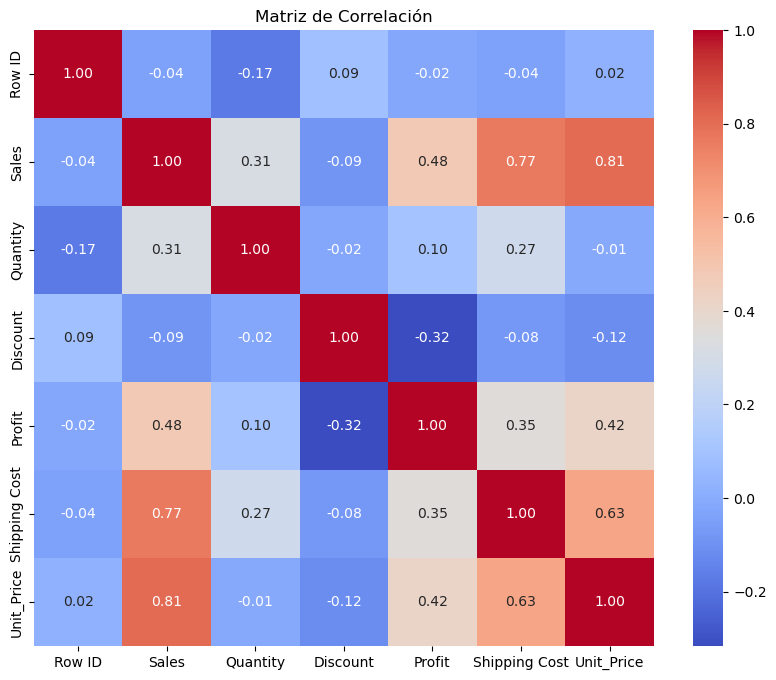

In [ ]:
#De acá en adelante comenzamos a analizar los datos para responder a preguntas específicas sobre el negocio, como por ejemplo:
#Correlación entre variables numéricas
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Considerando las relaciones entre los campos podemos empezar a obtener información valiosa sobre el mercado a nivel mundial.

Hipótesis: La política de descuentos agresivos está disminuyendo el margen de ganancia en ciertas regiones sin generar un aumento proporcional en el volumen de ventas.
Preguntas a responder:

        ¿Cuál es la correlación entre el campo de “Discount” y el “Profit”?

        ¿Existe un punto de quiebre donde la venta siempre resulta en pérdida?

        ¿Qué categorías de productos sufren más por los descuentos excesivos?


C:\Users\usuario\AppData\Local\Temp\ipykernel_20560\133911762.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{float(t.get_text()):.0%}' for t in plt.gca().get_xticklabels()])


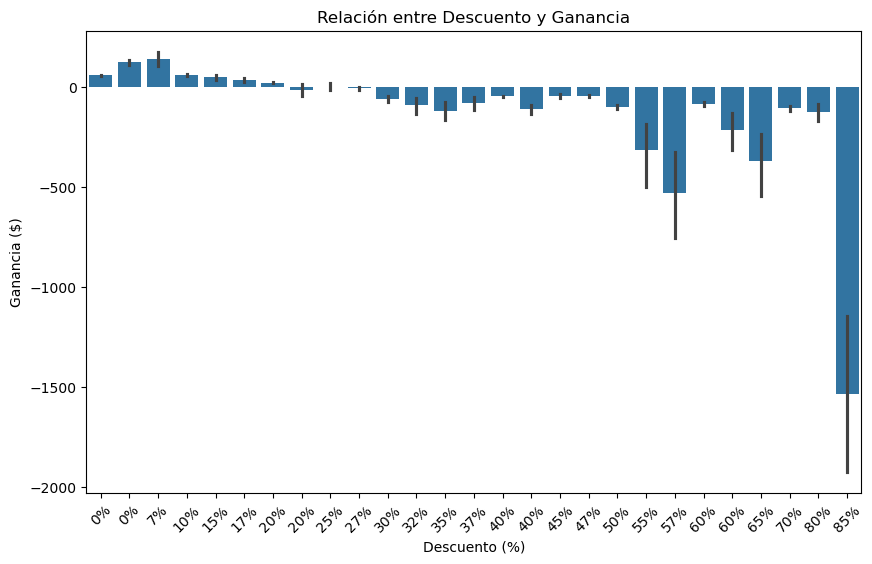

In [ ]:
#Correlación entre Discount y Profit por gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='Profit', data=df)
plt.title('Relación entre Descuento y Ganancia')
plt.xlabel('Descuento (%)')
plt.ylabel('Ganancia ($)')
plt.gca().set_xticklabels([f'{float(t.get_text()):.0%}' for t in plt.gca().get_xticklabels()]) #Esta linea convierte los valores de X en %
plt.xticks(rotation=45)
plt.show()



Como podemos observar existe una correlación negativa entre el beneficio de las ventas (Profit) y los descuentos ofrecidos (Discount) aunque dentro del rango 0 a 20% se mantiene positiva. Es necesario desglozar entre productos para tener un  valor más acertado de qué descuentos generan mayores beneficios
A partir de este gráfico podemos notar claramente que descuentos mayores a 20% generan pérdida en el mercado por lo que no es aconsejable superar este valor

C:\Users\usuario\AppData\Local\Temp\ipykernel_20560\3906098522.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{float(t.get_text()):.0%}' for t in plt.gca().get_xticklabels()])
C:\Users\usuario\AppData\Local\Temp\ipykernel_20560\3906098522.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{float(t.get_text()):.0%}' for t in plt.gca().get_xticklabels()])
C:\Users\usuario\AppData\Local\Temp\ipykernel_20560\3906098522.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{float(t.get_text()):.0%}' for t in plt.gca().get_xticklabels()])


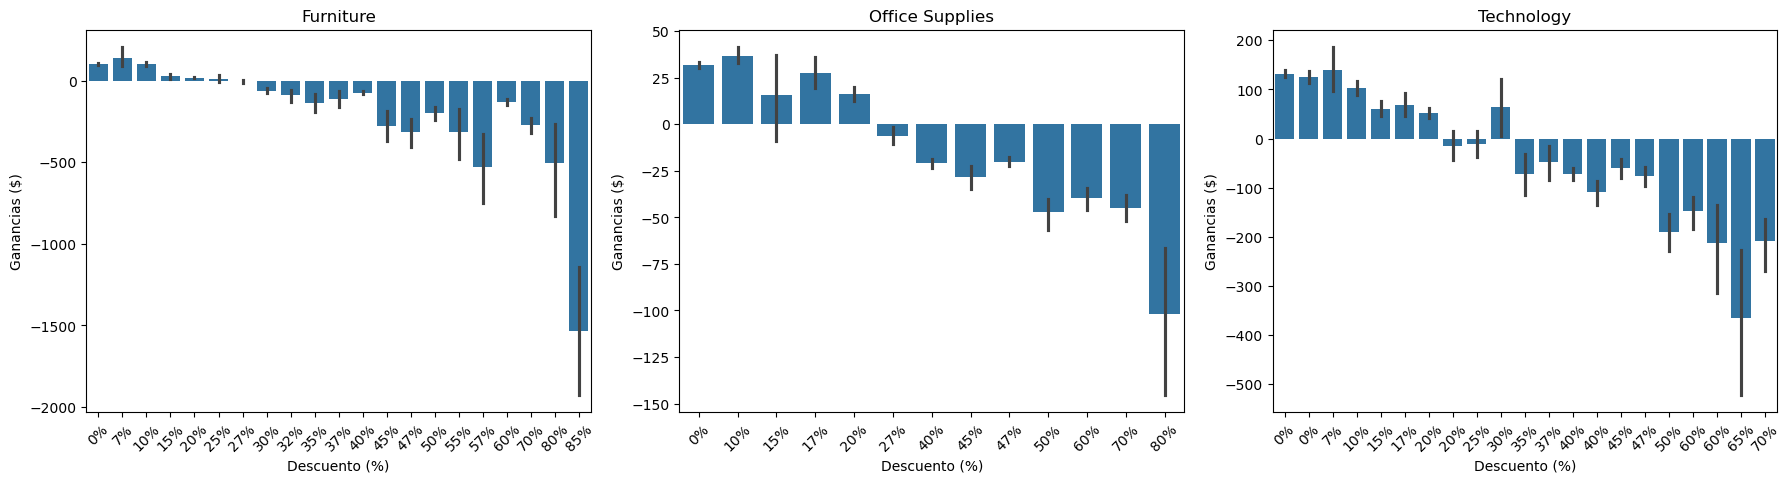

In [28]:
#Categorias que se ven más afectadas por los descuentos en términos de Ganancias ($)
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='Discount', y='Profit', data=df[df['Category'] == 'Furniture'])
plt.title('Furniture')
plt.xlabel('Descuento (%)')
plt.ylabel('Ganancias ($)')
plt.xticks(rotation=45) 
plt.gca().set_xticklabels([f'{float(t.get_text()):.0%}' for t in plt.gca().get_xticklabels()])
plt.subplot(1, 3, 2)
sns.barplot(x='Discount', y='Profit', data=df[df['Category'] == 'Office Supplies'])
plt.title('Office Supplies')
plt.xlabel('Descuento (%)')
plt.ylabel('Ganancias ($)')
plt.xticks(rotation=45)
plt.gca().set_xticklabels([f'{float(t.get_text()):.0%}' for t in plt.gca().get_xticklabels()])
plt.subplot(1, 3, 3)
sns.barplot(x='Discount', y='Profit', data=df[df['Category'] == 'Technology'])
plt.title('Technology')
plt.xlabel('Descuento (%)')
plt.ylabel('Ganancias ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_xticklabels([f'{float(t.get_text()):.0%}' for t in plt.gca().get_xticklabels()])
plt.show()



Como podemos observar, la categoría Furniture (Muebles) es la más afectada por los descuentos. Habría que analizar si el costo de shipping es demasiado costoso para cubrir el beneficio de la compra.

En conclusión a estas 3 preguntas:
-La relación de Beneficio y Descuentos es negativa aunque si se ajusta el rango hasta 20% de descuento es productiva obteniendose beneficios y atracción sobre el mercado, siendo el mayor beneficio cercano al 10% de descuento.
-Descuentos mayores al 20% generan pérdidas en el mercado.
-La categoría de productos más afectada por los descuentos es la de Furniture (Muebles)


    Hipótesis: Ciertas subcategorías de productos (probablemente las más pesadas o voluminosas) son logísticamente ineficientes y generan pérdidas sistemáticas.
    Preguntas:
    ¿Existen subcategorías que generan pérdidas? ¿Tiene relación respecto a los costos de envío?
    ¿Qué categoría tiene mejor ganancia?
    ¿Cuáles son las 3 subcategorías más rentables y las 3 menos rentables (o con pérdidas)?
    
    


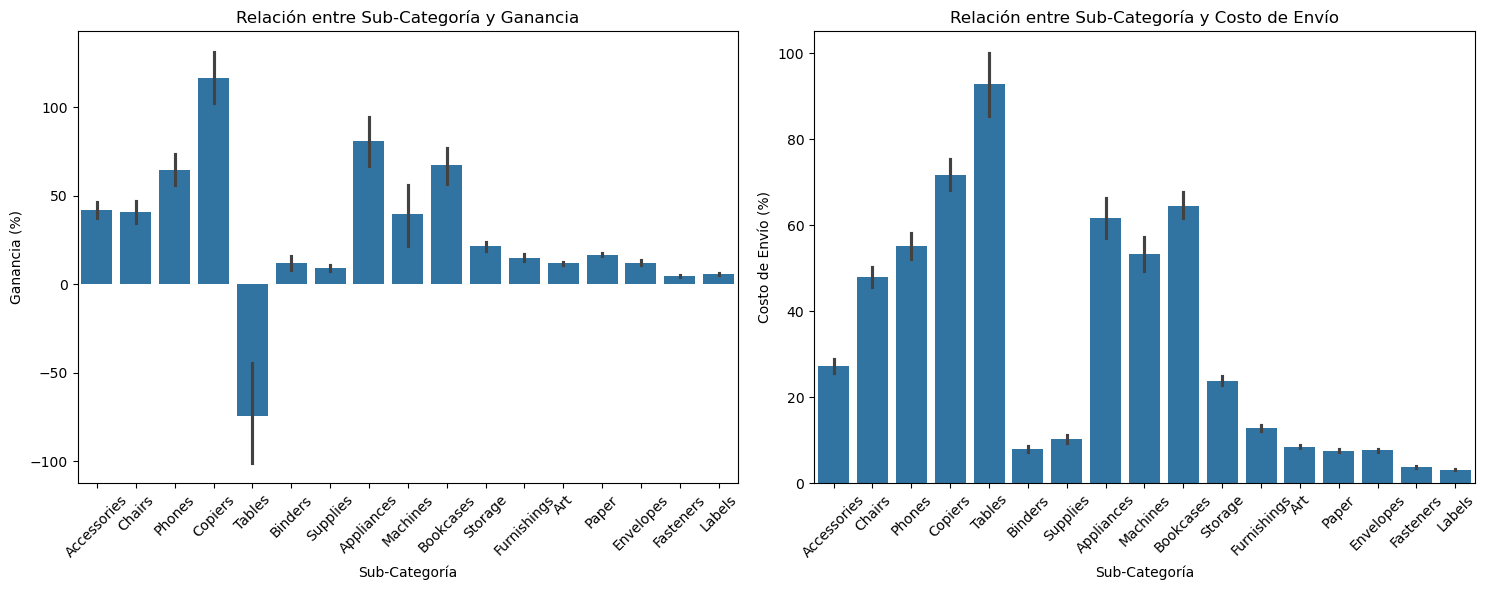

In [35]:
#Correlación entre sub categorias y profit por gráfico de barras
#Correlacion entre Shipping Costo y Subcategoria por gráfico de barras
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Sub-Category', y='Profit', data=df)
plt.title('Relación entre Sub-Categoría y Ganancia')
plt.xlabel('Sub-Categoría')
plt.ylabel('Ganancia (%)')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.barplot(x='Sub-Category', y='Shipping Cost', data=df)
plt.title('Relación entre Sub-Categoría y Costo de Envío')
plt.xlabel('Sub-Categoría')
plt.ylabel('Costo de Envío (%)')
plt.xticks(rotation=45)
plt.tight_layout()


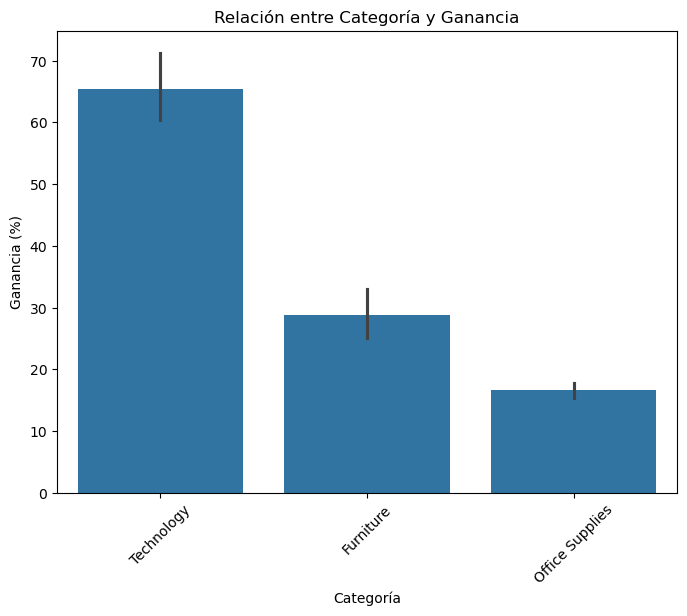

In [119]:
#Correlacion entre Category y Profit por gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Profit', data=df)
plt.title('Relación entre Categoría y Ganancia')
plt.xlabel('Categoría')
plt.ylabel('Ganancia (%)')
plt.xticks(rotation=45)
plt.show()


-Observando el gráfico, podemos ver que efectivamente una de las Sub-Categorías de productos más pesados termina generando pérdidas en lugar de beneficios y al observar los costos de envío claramente es una Sub-Categoría muy costosa logisticamente. Además es parte de la categoría con descuentos más altos por lo que puede ser otro factor que genere demasiadas pérdidas

-La categoría con más ganancias es la de Technology
-Respecto a la siguiente pregunta, los sujetadores, etiquetas y carpetas (Fasteners, Labels y Binders respectivamente) son los productos que generan menor beneficio en cuanto a ventas. Por el otro lado, las Estanterías, Accesorios y Copiadoras (Bookcases, Appliances y Copiers respectivamente) son las más productivas en cuanto a beneficio, siendo la última la mejor por casi el doble de beneficio frente a las demás.


Hipótesis: Existen mercados específicos donde los costos operativos (o de envío) superan los ingresos, haciendo que la presencia en esos países sea insostenible.

    Preguntas a responder:

        ¿Qué países tienen Ventas (Sales) altas, pero Ganancia (Profit) negativa?

        ¿Cómo varían los costos de envío (Shipping Cost) por región? ¿Son desproporcionados en algún continente?   

        ¿Qué mercado es el más rentable en términos absolutos y cuál en términos relativos (margen)?

        


In [121]:
#Agrupamos por País para sumar métricas
analisis_pais = df.groupby('Country')[['Sales', 'Profit', 'Shipping Cost']].sum()

#Filtramos para quedarnos solo con los que tienen Ganancia NEGATIVA
paises_con_perdidas = analisis_pais[analisis_pais['Profit'] < 0]

#Ordenamos de mayor a menor las ventas
#Así vemos primero los países donde facturamos millones pero perdemos dinero.
top_problemas = paises_con_perdidas.sort_values('Sales', ascending=False)

#Resultados
print("--- Países con 'Fugas de Dinero' (Ventas Altas / Profit Negativo) ---")
print(top_problemas.head(10)) # Mostramos los 10 casos más graves

--- Países con 'Fugas de Dinero' (Ventas Altas / Profit Negativo) ---
                           Sales       Profit  Shipping Cost
Country                                                     
Philippines         183420.16500 -16128.22500       17882.51
Dominican Republic  126140.58128  -7613.49872       14588.39
Turkey              108507.94800 -98447.23200       11664.16
Honduras             90125.64860 -29482.37140        9671.80
Netherlands          77514.94500 -41070.07500        9005.75
Thailand             77051.95500  -7308.19500        7736.53
Vietnam              65800.19940  -1870.23060        7684.37
Pakistan             58872.61200 -22446.64800        5833.09
Argentina            57511.78328 -18693.79672        6366.51
Nigeria              54350.35200 -80750.71800        6183.11


Como podemos observar en la tabla, se ordenan de mayor a menor los países según su ganancia en ventas manteniendo una ganancia final negativa. Es crucial analizar estos países para disminuir pérdidas


In [ ]:




#Agrupamos por mercado y sumamos Ventas y Ganancias
rentabilidad_mercado = df.groupby('Market')[['Sales', 'Profit']].sum()

#Calculamos el Margen Relativo (Profit / Sales) y multiplicamos por 100 para tener el porcentaje
rentabilidad_mercado['Margin_Percent'] = (rentabilidad_mercado['Profit'] / rentabilidad_mercado['Sales']) * 100

#Ordenamos para encontrar los ganadores
# Más rentable en términos absolutos (Dinero total)
top_absoluto = rentabilidad_mercado.sort_values('Profit', ascending=False).head(1)

# Más rentable en términos relativos (Eficiencia/Margen)
top_relativo = rentabilidad_mercado.sort_values('Margin_Percent', ascending=False).head(1)


print("--- Rentabilidad por Mercado ---\n")
print(rentabilidad_mercado.sort_values('Profit', ascending=False))
print(f"\nGanador Absoluto (Más dinero generado): {top_absoluto.index[0]} con ${top_absoluto['Profit'].values[0]:.2f}")
print(f"Ganador Relativo (Mejor margen): {top_relativo.index[0]} con {top_relativo['Margin_Percent'].values[0]:.2f}%")  



--- Rentabilidad por Mercado ---

               Sales        Profit  Margin_Percent
Market                                            
APAC    3.585744e+06  436000.04900       12.159263
EU      2.938089e+06  372829.74150       12.689532
US      2.297201e+06  286397.02170       12.467217
LATAM   2.164605e+06  221643.48708       10.239442
Africa  7.837732e+05   88871.63100       11.338947
EMEA    8.061613e+05   43897.97100        5.445309
Canada  6.692817e+04   17817.39000       26.621660

Ganador Absoluto (Más dinero generado): APAC con $436000.05
Ganador Relativo (Mejor margen): Canada con 26.62%


Considerando este resultado, es importante prestar servicio y atención a estos mercados para que sigan rindiendo eficientemente


In [123]:
#Definimos una nueva columna para conocer el promedio de costo de envio por venta, lo que nos permitirá identificar si el costo de envío es un factor importante en las pérdidas de ciertos países

df['Shipping_Cost_Per_Sale'] = df['Shipping Cost'] / df['Sales']
#Calculamos el costo de envío promedio por venta para las diferentes regiones
costo_envio_por_region = df.groupby('Country')['Shipping Cost'].mean().sort_values(ascending=False)
print("\nCosto de Envío Promedio por Venta por País:")
print(costo_envio_por_region.head(20))




Costo de Envío Promedio por Venta por País:
Country
Taiwan                      155.660714
Chad                        148.970000
Lesotho                     135.650000
Montenegro                   93.937500
Slovenia                     61.220000
Republic of the Congo        59.303333
Central African Republic     57.625714
Namibia                      50.370000
Bangladesh                   46.402883
Estonia                      46.070000
Uruguay                      45.229583
Mauritania                   44.115000
Albania                      43.660625
Qatar                        43.078125
China                        41.998415
Afghanistan                  41.822364
Malaysia                     41.111193
South Sudan                  40.855000
Cambodia                     40.483111
India                        39.730367
Name: Shipping Cost, dtype: float64


In [124]:

#Definimos una función para el análisis 
def analizar_costos_envio(df, columna_agrupacion):
    # Agrupamos y calculamos métricas clave
    analisis = df.groupby(columna_agrupacion).agg({
        'Sales': 'sum',
        'Shipping Cost': 'sum',
        'Profit': 'sum'
    }).reset_index()
    
    #Calculamos el "Ratio de Envío" (% de la venta que se va en envío)
    analisis['Shipping_Ratio_Percent'] = (analisis['Shipping Cost'] / analisis['Sales']) * 100
    
    #Ordenamos por el ratio más alto (los más caros proporcionalmente)
    return analisis.sort_values('Shipping_Ratio_Percent', ascending=False)





#Análisis por Región
print("--- Top 10 Paises con Envíos más Desproporcionados ---")
df_Country = analizar_costos_envio(df, 'Country')
print(df_Country[['Country', 'Shipping_Ratio_Percent', 'Sales']].head(10).round(2))

--- Top 10 Paises con Envíos más Desproporcionados ---
                      Country  Shipping_Ratio_Percent    Sales
126                    Taiwan                   28.50  7647.63
24                       Chad                   22.62  1317.03
122                 Swaziland                   18.43   288.03
1                     Albania                   17.97  3888.12
23   Central African Republic                   16.97  2377.56
72                    Liberia                   16.71  3560.88
99                   Paraguay                   16.67  2590.37
70                    Lebanon                   16.13  2796.66
88                    Namibia                   15.63  2899.47
8                  Azerbaijan                   15.22  5631.51


Podemos observar en la tabla que muchos países poseen valores de costo de envío demasiado altos considerando que por encima del 15% de la compra supone un costo excesivo para obtener ganancias. Por ende, es necesario evaluar estos países para mejorar logística


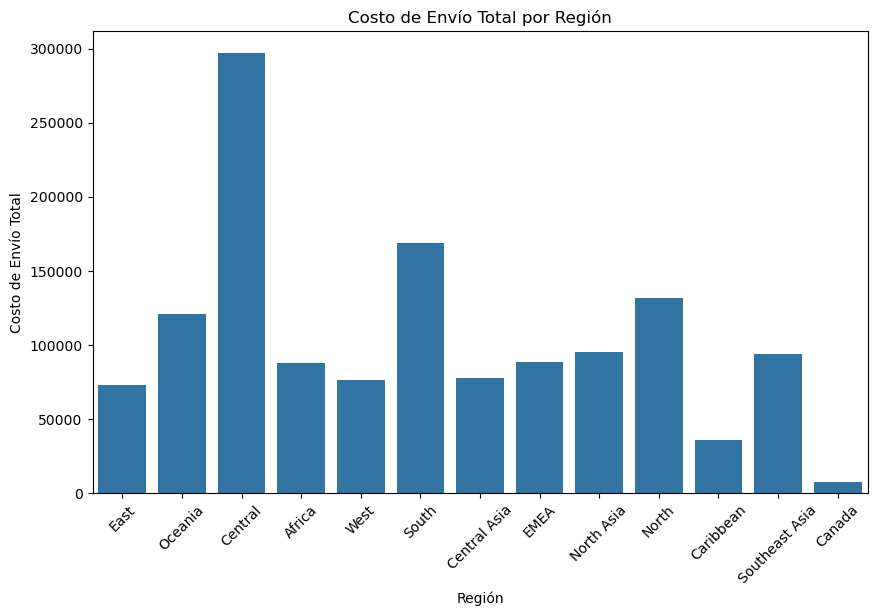

In [126]:
#Grafico de como varian los shipping cost por region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Shipping Cost', data=df, estimator=sum, errorbar=None)
plt.title('Costo de Envío Total por Región')
plt.xlabel('Región')
plt.ylabel('Costo de Envío Total')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Paises dentro de la region Central 
paises_central = df[df['Region'] == 'Central']['Country'].unique()
print("Países en la región Central:")
print(paises_central)


Países en la región Central:
['Germany' 'France' 'United States' 'El Salvador' 'Nicaragua' 'Austria'
 'Netherlands' 'Guatemala' 'Belgium' 'Switzerland' 'Honduras' 'Panama']


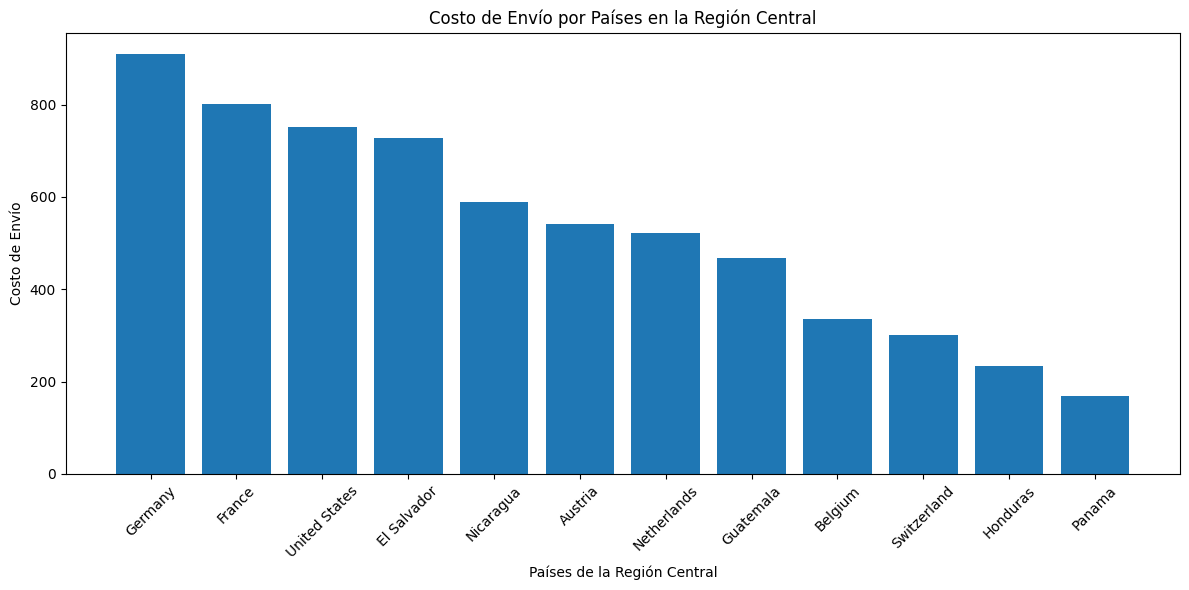

In [ ]:
#Grafico de Shipping Cost por paises de la region Central
plt.figure(figsize=(12, 6))
df_central = df[df['Region'] == 'Central']
plt.bar(df_central['Country'], df_central['Shipping Cost'])
plt.xlabel('Países de la Región Central')
plt.ylabel('Costo de Envío')
plt.title('Costo de Envío por Países en la Región Central')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    Hipótesis: El segmento corporativo es más estable y rentable, mientras que el consumidor final es más sensible al precio y requiere más descuentos.

    Preguntas a responder:

        ¿Qué segmento de cliente aporta mayor ganancia promedio por orden?

        ¿Cómo es la frecuencia de compra y el valor monetario (RFM simplificado) entre los diferentes segmentos?

        ¿Y el RFM entre las diferentes regiones?

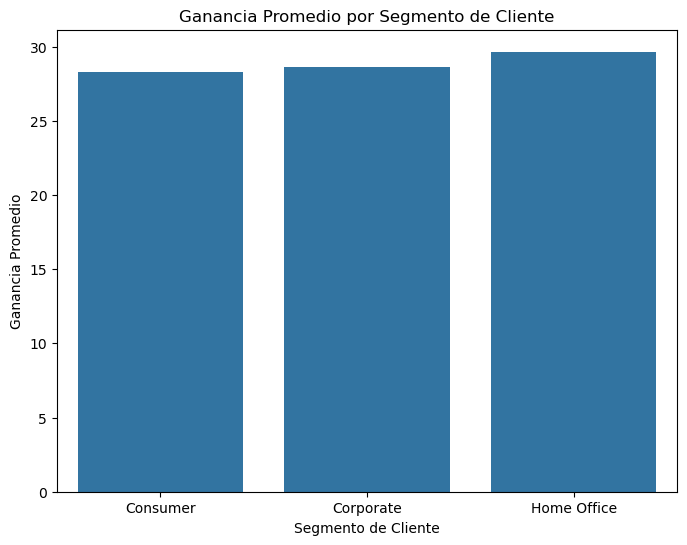

In [128]:
#Qué segmento de cliente aporta mayor ganancia promedio 
plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Profit', data=df, estimator='mean', errorbar=None)
plt.title('Ganancia Promedio por Segmento de Cliente')
plt.xlabel('Segmento de Cliente')
plt.ylabel('Ganancia Promedio')
plt.show()


Como podemos observar, la ganancia promedio entre los distintos sectores es similar. Procedemos a analizar sus RFM para detectar diferencias.


In [130]:


# Definimos una función para calcular RFM
def calcular_rfm_segmento(df, col_cliente, col_fecha, col_orden, col_monto, col_segmento):
    
    # Fecha de referencia: El día siguiente a la última venta registrada
    fecha_maxima = df[col_fecha].max() + pd.Timedelta(days=1)
    
    # Agrupamos por Cliente para calcular sus métricas individuales
    rfm_clientes = df.groupby(col_cliente).agg({
        col_fecha: lambda x: (fecha_maxima - x.max()).days, # Recencia: Días desde la última compra
        col_orden: 'nunique',                               # Frecuencia: Cantidad de compras únicas
        col_monto: 'sum',                                   # Valor Monetario: Total gastado
        col_segmento: 'first'                               # Segmento al que pertenece
    }).reset_index()
    
    # Renombramos para que sea legible
    rfm_clientes.columns = ['Cliente_ID', 'Recencia_Dias', 'Frecuencia', 'Valor_Total', 'Segmento']
    
    return rfm_clientes


# Usamos 'Region' como segmento, ya que es lo que tenemos disponible
df_rfm = calcular_rfm_segmento(
    df,                # Tu dataframe limpio
    col_cliente='Customer ID',  # ID del cliente
    col_fecha='Order Date',  # Fecha de la compra
    col_orden='Order ID',    # ID de la orden (para contar cuántas veces vino)
    col_monto='Sales',     # Dinero gastado
    col_segmento='Segment'       # Variable de agrupación
)

# Resumen por Segmento (Promedios)
rfm_resumen = df_rfm.groupby('Segmento')[['Recencia_Dias', 'Frecuencia', 'Valor_Total']].mean().round(2)

print("--- Análisis RFM por Región (Promedios por Cliente) ---")
print(rfm_resumen.sort_values('Valor_Total', ascending=False))

--- Análisis RFM por Región (Promedios por Cliente) ---
             Recencia_Dias  Frecuencia  Valor_Total
Segmento                                           
Corporate            84.22       16.24      8035.08
Consumer             82.83       16.27      7955.93
Home Office          94.58       15.94      7803.56


Al analizar las RFM por segmento notamos leves diferencias a favor de las corporaciones en cuestión de valor total pero no son sustanciales para marcar diferencia


In [ ]:
# Definimos una función para calcular RFM por region
def calcular_rfm_region(df, col_cliente, col_fecha, col_orden, col_monto, col_segmento):
    
    # Fecha de referencia: El día siguiente a la última venta registrada
    fecha_maxima = df[col_fecha].max() + pd.Timedelta(days=1)
    
    # Agrupamos por Cliente para calcular sus métricas individuales
    rfm_clientes = df.groupby(col_cliente).agg({
        col_fecha: lambda x: (fecha_maxima - x.max()).days, # Recencia: Días desde la última compra
        col_orden: 'nunique',                               # Frecuencia: Cantidad de compras únicas
        col_monto: 'sum',                                   # Valor Monetario: Total gastado
        col_segmento: 'first'                               # Region al que pertenece
    }).reset_index()
    
    # Renombramos para que sea legible
    rfm_clientes.columns = ['Cliente_ID', 'Recencia_Dias', 'Frecuencia', 'Valor_Total', 'Segmento']
    
    return rfm_clientes


# Usamos 'Region' como segmento, ya que es lo que tenemos disponible
df_rfm = calcular_rfm_region(
    df,                # Tu dataframe limpio
    col_cliente='Customer ID',  # ID del cliente
    col_fecha='Order Date',  # Fecha de la compra
    col_orden='Order ID',    # ID de la orden (para contar cuántas veces vino)
    col_monto='Sales',     # Dinero gastado
    col_segmento='Region'       # Variable de agrupación
)

# Resumen por Segmento (Promedios)
rfm_resumen = df_rfm.groupby('Segmento')[['Recencia_Dias', 'Frecuencia', 'Valor_Total']].mean().round(2)

print("--- Análisis RFM por Región (Promedios por Cliente) ---")
print(rfm_resumen.sort_values('Valor_Total', ascending=False))

--- Análisis RFM por Región (Promedios por Cliente) ---
                Recencia_Dias  Frecuencia  Valor_Total
Segmento                                              
East                    27.11       26.80     14503.81
Central Asia            28.56       25.35     14493.20
North Asia              31.33       26.23     14165.82
West                    26.10       26.25     13959.23
Central                 33.15       25.90     13793.37
Caribbean               22.15       25.80     13786.36
South                   30.74       27.07     13727.41
Southeast Asia          29.34       25.21     13700.30
North                   26.51       26.41     13369.98
Oceania                 28.18       25.17     13229.41
Africa                 139.66        6.24      2139.57
EMEA                   143.93        6.48      2049.52
Canada                 133.26        5.97      1920.19


En este caso, si analizamos las RFM por región podemos detectar que África, EMEA y Canadá tienen las RFM más bajas, destacando sobre todo a Canadá que, a pesar de esto, vimos anteriormente que es el mercado con mejor margen relativo. Considerando estos datos, se debe mejorar la frecuencia de compra haciendo hincapié en este último 


In [110]:
#Calculo para identificar el top 10 de clientes más valiosos (mayor Sales) y su segmento
top_clientes = df_rfm.sort_values('Valor_Total', ascending=False).head(10)
print("\n--- Top 10 Clientes Más Valiosos ---")
print(top_clientes[['Cliente_ID', 'Valor_Total', 'Segmento']])



--- Top 10 Clientes Más Valiosos ---
     Cliente_ID  Valor_Total   Segmento
1463   TA-21385  35668.12080       East
623    GT-14710  34471.89028      North
1489   TC-20980  34218.26900    Central
1405   SM-20320  31125.29496  Caribbean
237    BW-11110  30613.61650    Central
656    HL-15040  29664.23058    Oceania
1369   SE-20110  29532.62502    Central
1220   PS-19045  29252.31940      South
1243   RB-19360  29197.63460    Oceania
1587   ZC-21910  28472.81926    Central


Dentro del TOP 10 de Clientes, hay 4 que se encuentran en la region central, zona que tiene los mayores costos de shipping. Si queremos mantener esos clientes sería adecuado favorecerlos con costos de envío promocionales a fines de incentivar sus compras.